In [1]:
import pandas as pd
import numpy as np

In [4]:
news_df = pd.read_csv('OlympicNews.csv')

In [5]:
news_df.head()

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,1.100401e+06,20210722,동아일보,가시마=유재영,"첫승 노린 한국, 뉴질랜드에 0-1 충격패 8강행 빨간불",스포츠>축구,스포츠>월드컵,스포츠>올림픽_아시안게임,NaN,NaN,NaN,"크리스,권창훈,김학범,엄원상,황의조","울산,루마니아,일본,경기,한국,이바라키현,잉글랜드,2경기,발렌시아,도쿄,제주,대한민...","수원,가시마,태극기,축구대표팀,한국,A대표팀,이바라키현,B조,대표팀,뉴질랜드,온두라스","한국,뉴질랜드,충격패,8강,최악,출발,김학범,감독,축구대표팀,제물,뉴질랜드,충격,패...","한국,뉴질랜드,이바라키현,유효슈팅,8강,대표팀,이강인,잉글랜드,권창훈,황의조,2개,...",최악의 출발이었다. \n \n 김학범 감독이 이끄는 축구대표팀이 첫 승 제물로 삼았...,https://www.donga.com/news/article/all/2021072...,NaN
1,2.100601e+06,20210722,한국경제,김정호(tokjh6011@naver.com),"WHO ""코로나19 백신 지식재산권 유예? 강탈 아니다""",국제>일본,경제>경제일반,NaN,NaN,NaN,NaN,"응고지 오콘조이웨알라,거브러여수스,테워드로스","일본,아드하놈,도쿄,아프리카","WTO,세계보건기구(WHO),한경닷컴 객원,세계무역기구,WHO","유예,코로나19,백신,지식,재산,강탈,세계보건기구,사무총장,감염증,신종,코로나비이러...","사무총장,거브러여수스,한경닷컴,김정호,고위급,도쿄,코로나비이러스,응고지,코로나19,...",세계보건기구(WHO) 사무총장은 신종 코로나비이러스 감염증(코로나 19) 백신의 지...,https://www.hankyung.com/international/article...,NaN
2,1.100801e+06,20210722,조선일보,조성호 기자,일본 국민들 “올림픽보다 오타니 경기 더 보고파”,스포츠>올림픽_아시안게임,스포츠>월드컵,스포츠>축구>한국프로축구,NaN,NaN,NaN,"야코프,칸디,파벨,스키트,오타니","서아프리카,미국,스웨덴,일본,경기,장도,중계,네덜란드,북한,수도권,칠레,영국,체코","NHK,TBS,경기,국제올림픽위원회,가디언,조직위,J캐스트,트위터,IOC,페이스북,...","올림픽,일본,국민,오타니,경기,도쿄,올림픽,개막,하루,국민들,정작,일본,국민,올림픽...","코로나,도쿄올림픽,일본,오타니,영국,도쿄,선수촌,확진자,선수단,관계자,판매량,몸동작...",도쿄올림픽 개막이 하루 앞으로 다가왔지만 정작 일본 국민들은 올림픽보다는 메이저리그...,https://www.chosun.com/international/internati...,NaN
3,8.100101e+06,20210722,KBS,김도환,김연경 ‘개막식에 구르기?’,스포츠>올림픽_아시안게임,스포츠>농구_배구,스포츠>축구,NaN,NaN,NaN,김연경,도쿄,대한민국,"김연경,개막식,앵커,대한민국,여자,기수,선정,김연경,개막식,세리머니,상상,김도환,보...","김연경,개막식,김도환,공격수,예능감,슈퍼스타,대한민국,친언니,국가대표,도쿄,여자배구...",[앵커]\n\n 대한민국의 여자 기수로 선정된 김연경이 개막식에 어떤 세리머니를 할...,https://news.kbs.co.kr/news/view.do?ncd=524028...,NaN
4,8.100101e+06,20210722,KBS,강재훈,"코로나19-무관중-성평등, ‘키워드’로 본 도쿄 올림픽",스포츠>올림픽_아시안게임,스포츠>월드컵,스포츠>축구>한국프로축구,사고>스포츠사고,NaN,NaN,최다인,"도쿄,경기,후쿠시마","일본,경기,IOC","코로나19,무관중,성평등,키워드,도쿄,올림픽,앵커,개막,도쿄,올림픽,하루,코로나,악...","도쿄,선서자,개막식,무관중,성평등,코로나19,개회식,강재훈,종목들,팬들,ioc,스케...",[앵커]\n\n도쿄 올림픽 개막이 이제 하루 앞으로 다가 왔습니다.\n\n 코로나 ...,https://news.kbs.co.kr/news/view.do?ncd=524028...,NaN


In [6]:
news_df.sort_values(by=['언론사'], axis=0, inplace=True)
group_news = news_df.groupby('언론사')
group_news = group_news.count()
group_news.to_csv('news_to_num.csv', index=True, mode = 'w', encoding='utf-8')

In [7]:
group_news

,뉴스 식별자,일자,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
언론사,,,,,,,,,,,,,,,,,,
KBS,401,401,383,401,401,327,242,40,5,1,272,391,372,401,401,401,401,64
MBC,188,188,178,188,188,157,119,21,2,1,148,178,187,188,188,188,187,20
OBS,135,135,135,135,135,95,49,12,1,1,87,134,134,135,135,135,135,11
SBS,192,192,184,192,192,162,129,24,3,0,161,190,181,192,192,192,192,2
YTN,966,966,966,966,966,722,460,147,35,13,743,946,951,966,966,966,966,134
강원도민일보,184,184,184,184,184,170,152,16,2,1,146,182,183,184,184,184,184,1
강원일보,223,223,187,223,223,190,170,15,1,0,162,222,221,223,223,223,223,13
경기일보,67,67,67,67,67,59,52,15,2,1,54,67,67,67,67,67,67,0
경남도민일보,15,15,15,15,15,14,11,2,1,0,10,15,15,15,15,15,15,0


In [8]:
import warnings
warnings.filterwarnings(action='ignore') 

In [9]:
news_df = pd.read_csv('OlympicNews.csv')
news_df.sort_values(by=['일자'], axis=0, inplace=True)
news_data = news_df[['일자', '언론사']]

In [10]:
df_YTN = news_data[news_data['언론사'] == 'YTN']
df_KukMin = news_data[news_data['언론사'] == '국민일보']
df_GyeongJe = news_data[news_data['언론사'] == '매일경제']
df_Money = news_data[news_data['언론사'] == '머니투데이']
df_Seoul = news_data[news_data['언론사'] == '서울경제']
df_Asia = news_data[news_data['언론사'] == '아시아경제']
df_Aju = news_data[news_data['언론사'] == '아주경제']

In [11]:
df_YTN['date'] = pd.to_datetime(df_YTN['일자'].astype(str), format='%Y%m%d')
df_YTN.set_index(df_YTN['date'], inplace=True)
df_YTN['YTN'] = 1
df_YTN = df_YTN.drop('일자', 1)
df_YTN = df_YTN.drop('언론사', 1)
df_YTN = df_YTN.drop('date', 1)

df_KukMin['date'] = pd.to_datetime(df_KukMin['일자'].astype(str), format='%Y%m%d')
df_KukMin.set_index(df_KukMin['date'], inplace=True)
df_KukMin['국민일보'] = 1
df_KukMin = df_KukMin.drop('일자', 1)
df_KukMin = df_KukMin.drop('언론사', 1)
df_KukMin = df_KukMin.drop('date', 1)

df_GyeongJe['date'] = pd.to_datetime(df_GyeongJe['일자'].astype(str), format='%Y%m%d')
df_GyeongJe.set_index(df_GyeongJe['date'], inplace=True)
df_GyeongJe['매일경제'] = 1
df_GyeongJe = df_GyeongJe.drop('일자', 1)
df_GyeongJe = df_GyeongJe.drop('언론사', 1)
df_GyeongJe = df_GyeongJe.drop('date', 1)

df_Money['date'] = pd.to_datetime(df_Money['일자'].astype(str), format='%Y%m%d')
df_Money.set_index(df_Money['date'], inplace=True)
df_Money['머니투데이'] = 1
df_Money = df_Money.drop('일자', 1)
df_Money = df_Money.drop('언론사', 1)
df_Money = df_Money.drop('date', 1)

df_Seoul['date'] = pd.to_datetime(df_Seoul['일자'].astype(str), format='%Y%m%d')
df_Seoul.set_index(df_Seoul['date'], inplace=True)
df_Seoul['서울경제'] = 1
df_Seoul = df_Seoul.drop('일자', 1)
df_Seoul = df_Seoul.drop('언론사', 1)
df_Seoul = df_Seoul.drop('date', 1)

df_Asia['date'] = pd.to_datetime(df_Asia['일자'].astype(str), format='%Y%m%d')
df_Asia.set_index(df_Asia['date'], inplace=True)
df_Asia['아시아경제'] = 1
df_Asia = df_Asia.drop('일자', 1)
df_Asia = df_Asia.drop('언론사', 1)
df_Asia = df_Asia.drop('date', 1)

df_Aju['date'] = pd.to_datetime(df_Aju['일자'].astype(str), format='%Y%m%d')
df_Aju.set_index(df_Aju['date'], inplace=True)
df_Aju['아주경제'] = 1
df_Aju = df_Aju.drop('일자', 1)
df_Aju = df_Aju.drop('언론사', 1)
df_Aju = df_Aju.drop('date', 1)

In [12]:
total_sum = pd.concat([df_YTN.resample(rule='QS').sum(), df_KukMin.resample(rule='QS').sum(),
                     df_GyeongJe.resample(rule='QS').sum(), df_Money.resample(rule='QS').sum(),
                      df_Seoul.resample(rule='QS').sum(), df_Aju.resample(rule='QS').sum(),
                      df_Asia.resample(rule='QS').sum()])

In [13]:
total_sum.to_csv('Nearby three-months news.csv', index=True, mode='w', encoding='utf-8')
total_sum

,YTN,국민일보,매일경제,머니투데이,서울경제,아주경제,아시아경제
date,,,,,,,
2021-04-01,566.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-01,400.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-01,NaN,241.0,NaN,NaN,NaN,NaN,NaN
2021-07-01,NaN,222.0,NaN,NaN,NaN,NaN,NaN
2021-04-01,NaN,NaN,290.0,NaN,NaN,NaN,NaN
2021-07-01,NaN,NaN,262.0,NaN,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN,205.0,NaN,NaN,NaN
2021-07-01,NaN,NaN,NaN,175.0,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN,NaN,244.0,NaN,NaN


In [14]:
news_feature = news_df['특성추출(가중치순 상위 50개)'].values.tolist()
keyword = []
for i in news_feature:
    for y in i.split(','):
        keyword.append(y)

In [15]:
from collections import Counter

In [16]:
count = Counter(keyword)
tags = count.most_common(50)
print(dict(tags))

{'도쿄': 6636, '일본': 5637, '코로나19': 3851, '도쿄올림픽': 3800, '한국': 3399, '미국': 2025, '올림픽': 1963, '선수들': 1537, '서울': 1446, '선수단': 1445, '스가': 1349, '위원회': 1346, '관계자': 1193, '확진자': 1187, '금메달': 1164, '코로나': 1157, 'ioc': 1051, '경기장': 1001, '독도': 911, '대표팀': 892, '대한민국': 855, '가능성': 821, '코로나바이러스': 814, '선수촌': 810, '위원장': 758, '도쿄도': 733, '긴급사태': 729, '평창': 705, '중국': 693, '조직위': 677, '국제올림픽위원회': 673, '만큼': 646, '베이징': 635, '한일': 616, '홈페이지': 609, '패럴림픽': 608, '영국': 592, '개막식': 546, '문재인': 538, '무관중': 533, '정상회담': 512, '청와대': 510, '프랑스': 503, '온라인': 500, '선수': 484, '1위': 462, '감염증': 430, '국가대표': 415, '김학범': 404, '올림픽공원': 403}


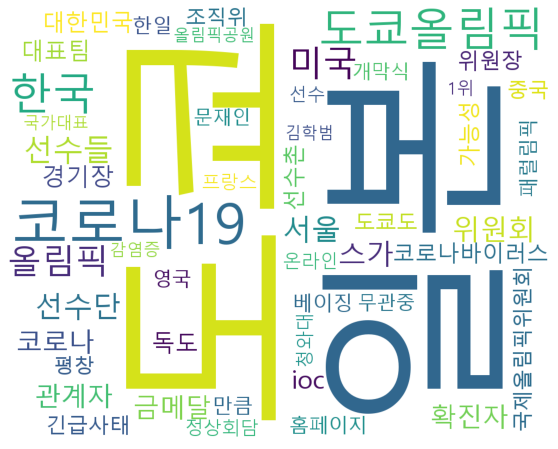

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(font_path='c:/windows/fonts/malgun.ttf',background_color='white', width=1000, height=800)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

In [18]:
news_data = news_df['키워드'].values.tolist()
keyword = []
nouns = ''
for i in news_data:
    for y in i.split(','):
        nouns +=y+' '
    keyword.append(nouns)
    nouns=''

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
tfv = TfidfVectorizer(ngram_range=(1,1))
vec_text = tfv.fit_transform(keyword)
words = tfv.get_feature_names()

In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters = 10, n_init = 17, n_jobs = -1, tol = 0.01, max_iter = 2000)
kmeans.fit(vec_text)
common_words = kmeans.cluster_centers_.argsort()[:, -1:-5:-1]
print(common_words)
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ' , '.join(words[word] for word in centroid))

[[58112 46185 64832 28667]
 [28635 64832 88656 69182]
 [77108 58112 28966 46185]
 [39150 68761 46185 78505]
 [29999 64832 83077 56999]
 [14325 76828 24489 82255]
 [49463 75917 15459 25588]
 [64832 58112 29768 78505]
 [87026 59469 63090 66500]
 [ 8576  8554 38216 38734]]
0 : 올림픽 , 선수 , 일본 , 대표
1 : 대통령 , 일본 , 회담 , 정상
2 : 출전 , 올림픽 , 대회 , 선수
3 : 백신 , 접종 , 선수 , 코로나19
4 : 독도 , 일본 , 표기 , 영토
5 : 감독 , 축구 , 김학범 , 평가전
6 : 스가 , 총리 , 개최 , 내각
7 : 일본 , 올림픽 , 도쿄 , 코로나19
8 : 현수막 , 욱일기 , 이순신 , 장군
9 : butter , bts , 발매 , 방탄
